In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [5]:
df['Year'].describe()

count     134.000000
mean     1946.500000
std        38.826537
min      1880.000000
25%      1913.250000
50%      1946.500000
75%      1979.750000
max      2013.000000
Name: Year, dtype: float64

In [15]:
dfAf2000=df[df['Year']>=2000]
dfAf2000.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,2006.5000,8.142857,7.856018,8.429696,7.750116
std,4.1833,0.713125,0.693719,0.733022,0.475023
min,2000.0000,7.062992,6.791339,7.334646,6.920582
25%,2003.2500,7.741142,7.466535,8.015748,7.493248
50%,2006.5000,7.956693,7.679134,8.234252,7.699784
75%,2009.7500,8.822835,8.541339,9.104331,8.051387
max,2013.0000,9.326772,8.992126,9.661417,8.546648


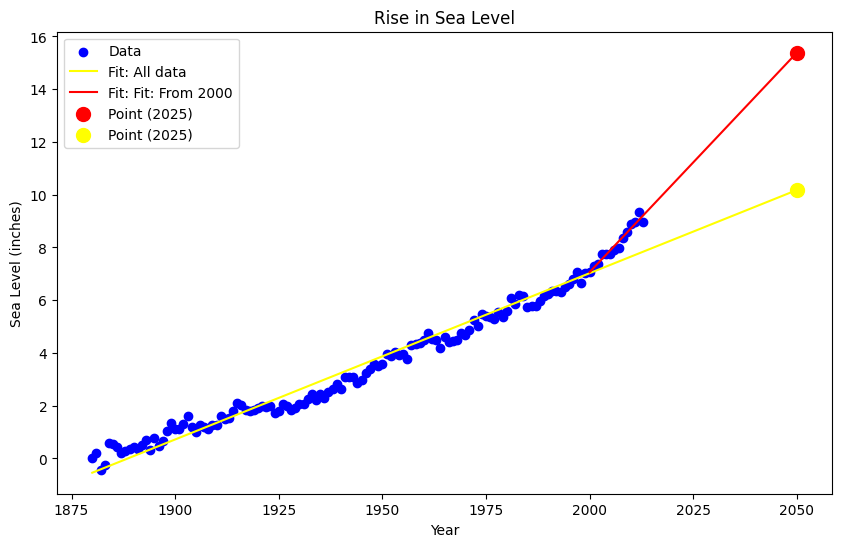

In [24]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Data', color='blue')
# Create first line of best fit for the entire dataset
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years_extended = pd.Series(range(df['Year'].min(), 2051))
plt.plot(years_extended, slope * years_extended + intercept, color='yellow', label='Fit: All data')


# Predict sea level rise for the year 2050
slopeAf, interceptAf, r_valueAf, p_valueAf, std_errAf = linregress(dfAf2000['Year'], dfAf2000['CSIRO Adjusted Sea Level'])
years_extendedAf = pd.Series(range(dfAf2000['Year'].min(), 2051))
plt.plot(years_extendedAf, slopeAf * years_extendedAf + interceptAf, color='red', label='Fit: Fit: From 2000')

yearTarget=2050
plt.scatter(yearTarget, slopeAf * yearTarget + interceptAf, color='red', s=100, edgecolor='red', zorder=5, label='Point (2025)')
plt.scatter(yearTarget, slope * yearTarget + intercept, color='yellow', s=100, edgecolor='yellow', zorder=5, label='Point (2025)')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()